In [1]:
from IPython.display import Audio
import numpy as np
import scipy.io.wavfile
import pandas as pd


from scipy.fftpack import fft
from scipy import signal
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from glob import glob
from os.path import join, abspath
from os import listdir, getcwd

import librosa
from audiolazy import *
%matplotlib inline

## MCC

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-795.432218,35.970238,-14.833815,28.815805,-14.721906,19.036209,5.313501,-35.151647,18.840924,-12.992666,...,28.161885,11.770693,-11.489983,-1.369369,-1.984072,9.970393,4.283526,-16.480585,-2.714869,OK
1,-814.875798,40.621469,-5.892730,19.256439,-11.342942,11.233098,2.637898,-27.200744,15.790923,-7.561739,...,20.706727,6.931099,-11.994173,-1.529951,-7.573341,4.184928,2.319815,-15.768163,-2.221081,OK
2,-852.077196,50.657204,12.393577,2.044998,4.737755,-3.952396,-11.259450,-3.961865,2.754834,-2.441120,...,-0.500637,3.492281,-2.607305,-7.972123,-5.364679,-2.198916,-3.158557,-4.289786,-3.611337,No
3,-847.212185,59.087908,21.051456,5.326199,0.842524,-11.764843,-18.949588,-9.338782,0.071845,-2.784443,...,-4.204624,-1.599677,-2.957116,-4.343794,-3.779825,-2.291657,-0.514011,-0.101787,-2.374789,No
4,-843.667844,61.742911,20.260771,3.522590,-0.747694,-11.665991,-15.886241,-6.715947,-2.189572,-8.579350,...,-5.857458,-1.240237,-2.747688,-4.855525,-3.592778,-1.793900,-2.024740,-2.532650,-1.937836,None


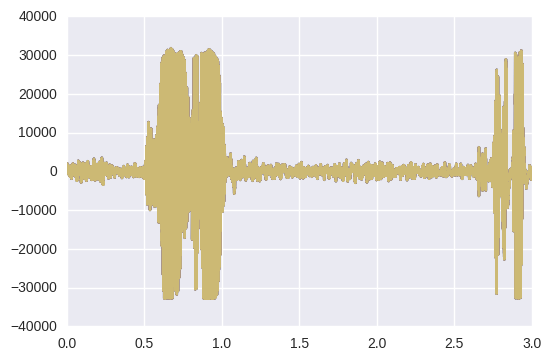

In [24]:
dir_path = 'data/'
full_path = join(abspath(getcwd()),dir_path, "*.wav")

n_mfcc=20
n_data=len(glob(full_path))
ukuran=np.zeros(shape=(n_data,n_mfcc))
#ukuran=np.empty(shape=[n_data,n_mfcc])
ukuran=pd.DataFrame(ukuran)
for file_name in glob(full_path):
    sample_rate, samples = scipy.io.wavfile.read(file_name)
    #print sample_rate
    samples=samples[0:int(3.5 * sample_rate)]
    
    
    
        
    plt.plot(Time,signal)
    #plt.subplot(211)
    S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=n_mfcc)
    for j in range(n_mfcc):
        for i in range(n_mfcc):
            #print np.mean(mfcc[j][i])
            ukuran[j][i]=np.mean(mfcc[j][i])


signal=samples
fs=sample_rate
Time=np.linspace(0, len(signal)/fs, num=len(signal))
    
               
ukuran['class']=None
ukuran['class'][:2]='OK'
ukuran['class'][2:4]='No'
ukuran




### PLOT
- Plot signal per voice

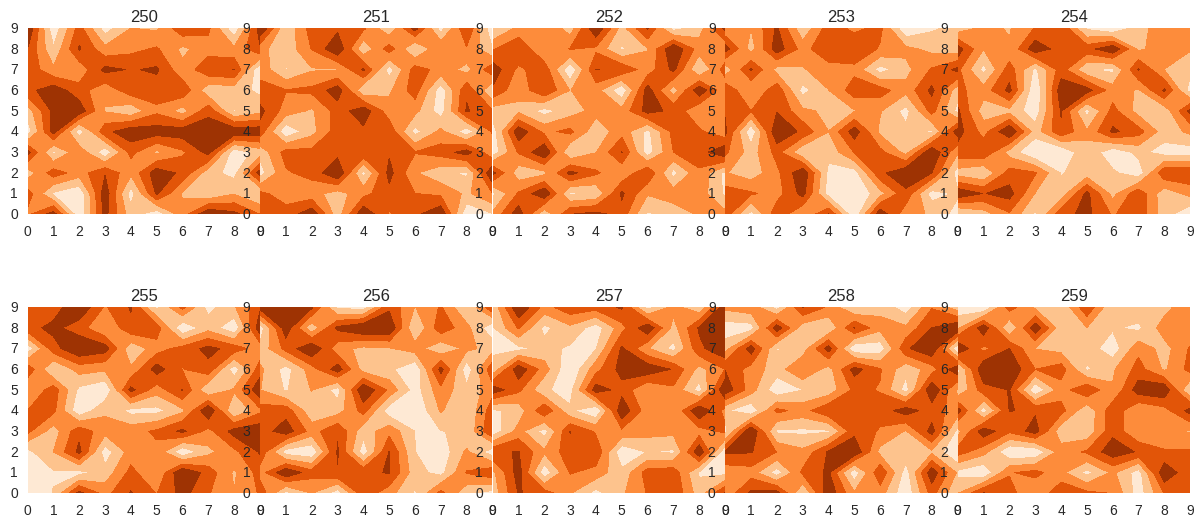

In [20]:
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):

    axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    axs[i].set_title(str(250+i))

ValueError: x and y must have same first dimension

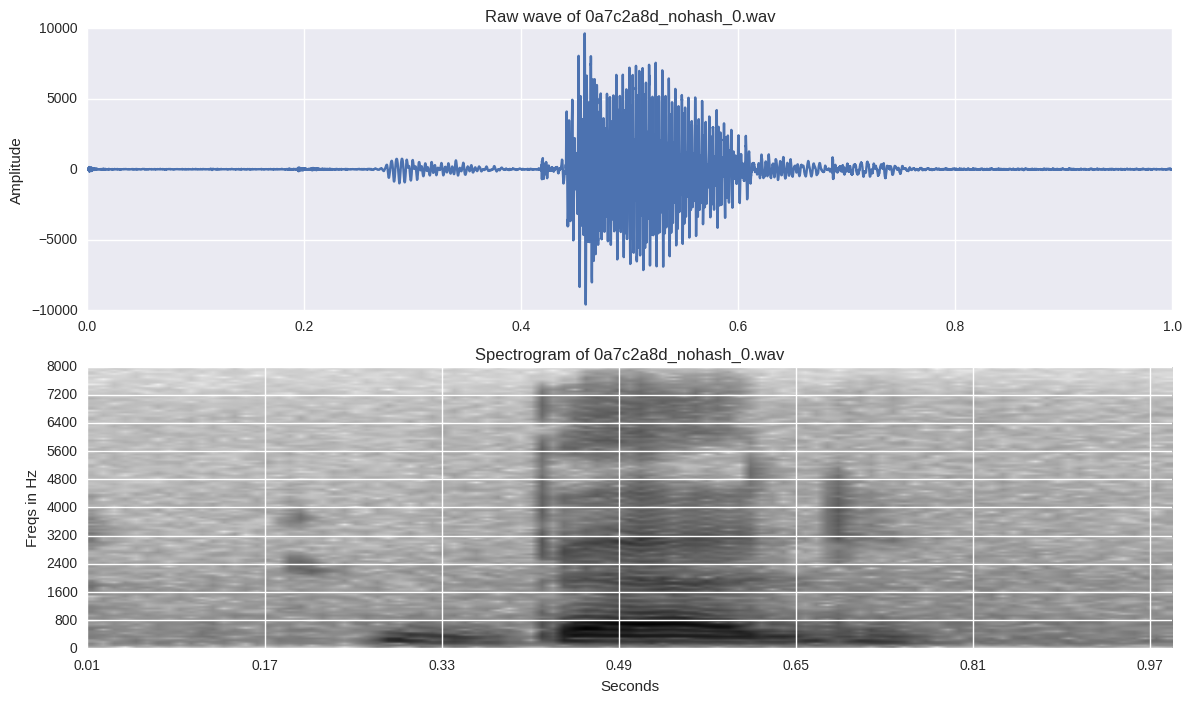

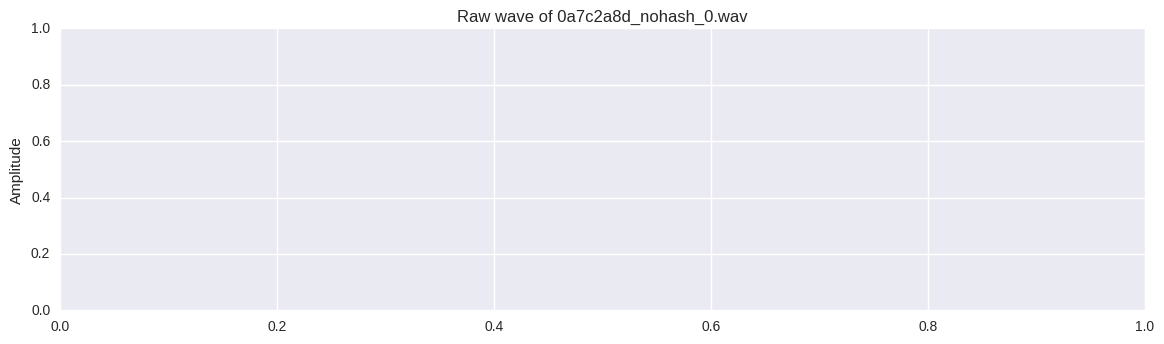

In [6]:
# function spectogram
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)





def spectrogram(file, label):
    eps=1e-10
    sample_rate, samples = wavfile.read(str(train_audio_path) + '/' + label + '/' + file)
    frequencies, times, spectrogram = signal.stft(samples, sample_rate, nperseg = sample_rate/50, noverlap = sample_rate/75)
    return np.log(np.abs(spectrogram).T+eps)





dir_path = 'data/'
full_path = join(abspath(getcwd()),dir_path, "*.wav")

n_mfcc=20
n_data=len(glob(full_path))
ukuran=np.zeros(shape=(n_data,n_mfcc))
#ukuran=np.empty(shape=[n_data,n_mfcc])
ukuran=pd.DataFrame(ukuran)
for file_name in glob(full_path):
    sample_rate, samples = scipy.io.wavfile.read(file_name)


#train_audio_path = 'data/'
#filename = '0a7c2a8d_nohash_0.wav'
#sample_rate, samples = scipy.io.wavfile.read(str(train_audio_path) + filename)
    freqs, times, spectrogram = log_specgram(samples, sample_rate)

    fig = plt.figure(figsize=(14, 8))
    ax1 = fig.add_subplot(211)
    ax1.set_title('Raw wave of ' + filename)
    ax1.set_ylabel('Amplitude')
    ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

    ax2 = fig.add_subplot(212)
    ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax2.set_yticks(freqs[::16])
    ax2.set_xticks(times[::16])
    ax2.set_title('Spectrogram of ' + filename)
    ax2.set_ylabel('Freqs in Hz')
    ax2.set_xlabel('Seconds')


In [3]:
pre_emphasis = 0.97
for file_name in glob(full_path):
    sample_rate, samples = scipy.io.wavfile.read(file_name)
    #print sample_rate
    samples=samples[0:int(3.5 * sample_rate)]
    emphasized_signal = np.append(samples[0], samples[1:] - pre_emphasis * samples[:-1])
    
    print emphasized_signal

[ -1.   -21.03  -7.66 ...,  10.01   3.34  -0.54]
[ 1153.      79.59    41.94 ...,  -136.94   -57.34  -104.28]
[ 1153.      79.59    41.94 ...,  -136.94   -57.34  -104.28]
[ 1153.      79.59    41.94 ...,  -136.94   -57.34  -104.28]
[ 1153.      79.59    41.94 ...,  -136.94   -57.34  -104.28]


#### JIKA MENGAMBIL SATU SUARA 

In [4]:
frame_size = 0.025
frame_stride = 0.01

frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = np.zeros((pad_signal_length - signal_length))
pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(np.int32, copy=False)]
print frames
print samples

[[  1.15300000e+03   7.95900000e+01   4.19400000e+01 ...,  -7.27700000e+01
   -8.22700000e+01  -4.20100000e+01]
 [ -6.56700000e+01   1.88100000e+01   2.99000000e+01 ...,   6.87000000e+01
   -1.83200000e+01  -1.42010000e+02]
 [ -3.91400000e+01  -7.96500000e+01   1.26400000e+01 ...,  -4.61500000e+01
    1.79300000e+01  -1.15010000e+02]
 ..., 
 [ -3.43600000e+01  -1.72000000e+01  -8.50000000e+00 ...,  -7.80500000e+01
   -5.34600000e+01  -4.40900000e+01]
 [ -5.27400000e+01  -1.14850000e+02  -1.33880000e+02 ...,   2.26700000e+01
   -1.77300000e+01   6.40000000e-01]
 [ -6.79400000e+01   1.81900000e+01  -1.80700000e+01 ...,   9.16300000e+01
    5.60700000e+01   3.93100000e+01]]
[ 1153  1198  1204 ..., -1978 -1976 -2021]


In [5]:
frames *= np.hamming(frame_length)
print len(frames)

348


In [6]:
NFFT = 512
mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

print mag_frames
print pow_frames

[[  3501.11198794   1787.55969397   2699.27440366 ...,    299.64878354
      93.1327712      52.83654522]
 [  2977.32397071   2599.73006379   1597.75110878 ...,    233.02231675
     337.32457998    165.22440949]
 [  2791.26855621   3004.99377588   5391.35341066 ...,    506.83203176
     443.11892451    559.35829817]
 ..., 
 [ 25225.88200711  12665.21702362   5726.12891772 ...,    333.06008999
     300.59825878    326.63422588]
 [ 14914.07092172   3467.74758803   1629.30684405 ...,    300.77635965
     277.51873302    200.51839865]
 [  3403.9443369    1764.01022813    608.74040887 ...,    138.23036528
     461.22125522    415.21553653]]
[[  2.39409866e+04   6.24095637e+03   1.42306295e+04 ...,   1.75369909e+02
    1.69408458e+01   5.45254006e+00]
 [  1.73133946e+04   1.32003836e+04   4.98595431e+03 ...,   1.06053516e+02
    2.22241938e+02   5.33185654e+01]
 [  1.52171487e+04   1.76366945e+04   5.67708820e+04 ...,   5.01716227e+02
    3.83504651e+02   6.11097082e+02]
 ..., 
 [  1.2428615

## FILTER BANK 

http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

In [7]:
nfilt = 40

low_freq_mel = 0
high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = np.floor((NFFT + 1) * hz_points / sample_rate)

fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = np.dot(pow_frames, fbank.T)
filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * np.log10(filter_banks)

tb=[]
for i in range (20):#jika mengikuti dengan mcc
    tb.append(np.mean(filter_banks[i]))
print tb
pd.DataFrame(tb).T

[76.266077932262533, 73.801825089178578, 77.020549790167522, 79.340711622085678, 81.138831677394819, 80.191970262976184, 79.135308890994366, 82.506111209563556, 82.93421912469158, 81.724558964196007, 80.742376469016989, 80.49653002233768, 82.251336576365347, 80.939656773816267, 83.670289946468401, 85.404507028373118, 80.792467478142115, 83.0348841609527, 85.73981339747003, 83.836214263035316]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,76.266078,73.801825,77.02055,79.340712,81.138832,80.19197,79.135309,82.506111,82.934219,81.724559,80.742376,80.49653,82.251337,80.939657,83.67029,85.404507,80.792467,83.034884,85.739813,83.836214


## LPC 

## FFT

In [15]:
from scipy import fftpack
for file_name in glob(full_path):
    sample_rate, samples = scipy.io.wavfile.read(file_name) # masih belum selesai
    sample_freq=fftpack.fftfreq(sample_rate)
    print samples

[ -1 -22 -29 ..., -22 -18 -18]
[ 1153  1198  1204 ..., -2248 -2157 -2233]
[ 1153  1198  1204 ..., -2248 -2157 -2233]
[ 1153  1198  1204 ..., -2248 -2157 -2233]
[ 1153  1198  1204 ..., -2248 -2157 -2233]


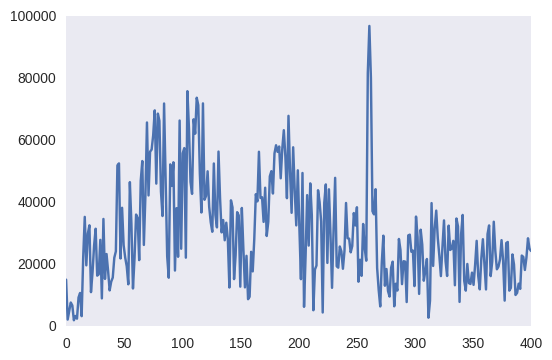

In [14]:
from scipy.fftpack import fft
# sample spacing
T = 1.0 / 800.0
N=600
yf = fft(samples)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()



In [5]:
from scipy import fftpack

f_s=rate
x=audio
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s
freqs

array([ 0.        ,  0.10478444,  0.20956889, ..., -0.31435333,
       -0.20956889, -0.10478444])

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from scipy.io import wavfile
import numpy as np
rate, audio = wavfile.read('data/0a7c2a8d_nohash_0.wav')

#We convert to mono by averaging the left and right channels.
audio = np.mean(audio,axis=0)
import time 

def cn(n):
   c = y*np.exp(-1j*2*n*np.pi*time/period)
   return c.sum()/c.size

def f(x, Nh):
   f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/period) for i in range(1,Nh+1)])
   return f.sum()

y2 = np.array([f(t,50).real for t in time])

plot(time, y)
plot(time, y2)

TypeError: 'module' object is not iterable

In [19]:
import numpy
x = numpy.arange(0,2*numpy.pi, numpy.pi/1000)
y = (x+numpy.pi/2) % numpy.pi - numpy.pi/2
fourier_trans = numpy.fft.rfft(y)/1000
fourier_trans

array([ -3.14159265e-03 +0.00000000e+00j,
         2.54994550e-16 -1.49956612e-16j,
         3.14159265e-03 -9.99996710e-01j, ...,
         3.14159265e-03 -9.86963687e-06j,
         2.26893004e-18 +4.70859203e-20j,  -3.14159265e-03 +0.00000000e+00j])

## STATISTIC 

- High Frequency Energy
- F0 Mean
- F0 range
- Speech and articulation rate
- Prosody
- Formants
- HNR

## Classification 

http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/

In [115]:
from sklearn.svm import SVC
from sklearn import metrics
clf=SVC() #Default hyperparameters
clf.fit(ukuran.iloc[:4,:-1],ukuran['class'][:4])
y_pred=clf.predict(ukuran.iloc[4:,:-1])
print('Accuracy Score:')
#print(metrics.accuracy_score(y_test,y_pred))
y_pred

Accuracy Score:


array(['No'], dtype=object)

In [ ]:
# main()

### UI 

https://github.com/vyassu/DeepSentiment